Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['stores.csv', 'features.csv', 'test.csv', 'train.csv', 'final_rf_model.pkl', 'sales_py.py']


# 🛒 Walmart Weekly Sales Prediction

This project uses machine learning (Random Forest) to predict weekly sales for Walmart stores.  
We analyze various features like temperature, fuel prices, markdown events, store size, and holidays to build a predictive model.



## 📂 Dataset Description

We used data from Walmart which includes:

- **Store**: Store number  
- **Dept**: Department number  
- **Date**: Weekly sales date  
- **Weekly_Sales**: Actual sales amount  
- **IsHoliday**: Whether the week is a holiday  
- **Temperature, Fuel_Price, CPI, Unemployment**: Economic indicators  
- **MarkDown1-5**: Promotional markdowns  
- **Type, Size**: Store type and area

# dataset is taken from a  Kaggle competition ( Walmart Sales Forecasting);

In [42]:
from google.colab import drive
drive.mount('/content/drive')
import os


folder_path = '/content/drive/MyDrive/Walmart_sales_project/'
print(os.listdir(folder_path))
folder_path = '/content/drive/MyDrive/Walmart_sales_project/'

import pandas as pd
import numpy as np


train = pd.read_csv(folder_path + 'train.csv')
features = pd.read_csv(folder_path + 'features.csv')
stores = pd.read_csv(folder_path + 'stores.csv')
test = pd.read_csv(folder_path + 'test.csv')  # if you have test file



In [43]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [44]:
# Merge
train_merged = pd.merge(train, features, how='left', on=['Store', 'Date'])

In [45]:
train_merged .head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [46]:
# ✅ Step 4: Merge stores.csv into the train_merged

In [47]:
# Merge into train_merged
final_train = pd.merge(train_merged, stores, how='left', on='Store')

In [48]:
final_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [49]:
# Check for Missing (Null)
final_train.isnull().sum()


,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [50]:
# For MarkDown columns, you could fill with 0 (assumes no markdown)

In [51]:
final_train.fillna({'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0}, inplace=True)


In [52]:
# drop one of those duplicate IsHoliday columns — you got IsHoliday_x and IsHoliday_y. They are the same info but came from two datasets merging.
final_train.drop(columns=['IsHoliday_y'], inplace=True)


In [53]:
final_train['Date'] = pd.to_datetime(final_train['Date'])


In [54]:
final_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [55]:
#Step 4: Quick stats check to see if values make sense:
final_train.describe()


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328


# next we are trying to get insights using graphs

# 1 st: Understand the target variable (Weekly_Sales)
# What:
# We want to see the overall distribution of sales.

# Is it normally distributed?

# Are there any crazy outliers?

# Why:
# Understanding this helps us know if we need special handling (like transforming the data) before modeling.

#  2nd : Analyze time-related trends
# What:

# Convert Date column to datetime (if not done).

# Plot sales over time to see trends, seasonality, spikes.

# Compare sales on holidays vs non-holidays.

# Why:
# Sales usually have time patterns — seasonality, holiday boosts, etc.
# This helps us understand if the date/time info affects sales.

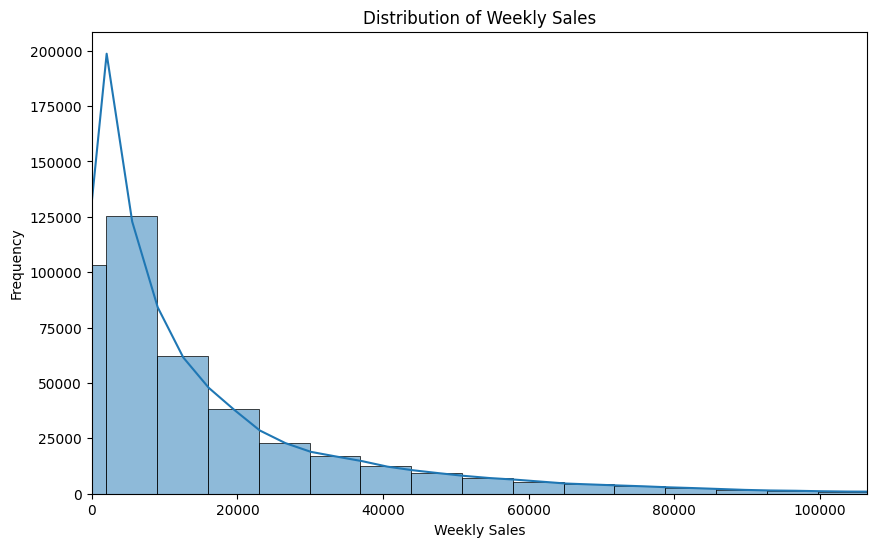

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Analyze Weekly_Sales distribution
plt.figure(figsize=(10,6))
sns.histplot(final_train['Weekly_Sales'], bins=100, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.xlim(0, final_train['Weekly_Sales'].quantile(0.99))  # Limit x-axis to 99th percentile to reduce effect of extreme outliers
plt.show()






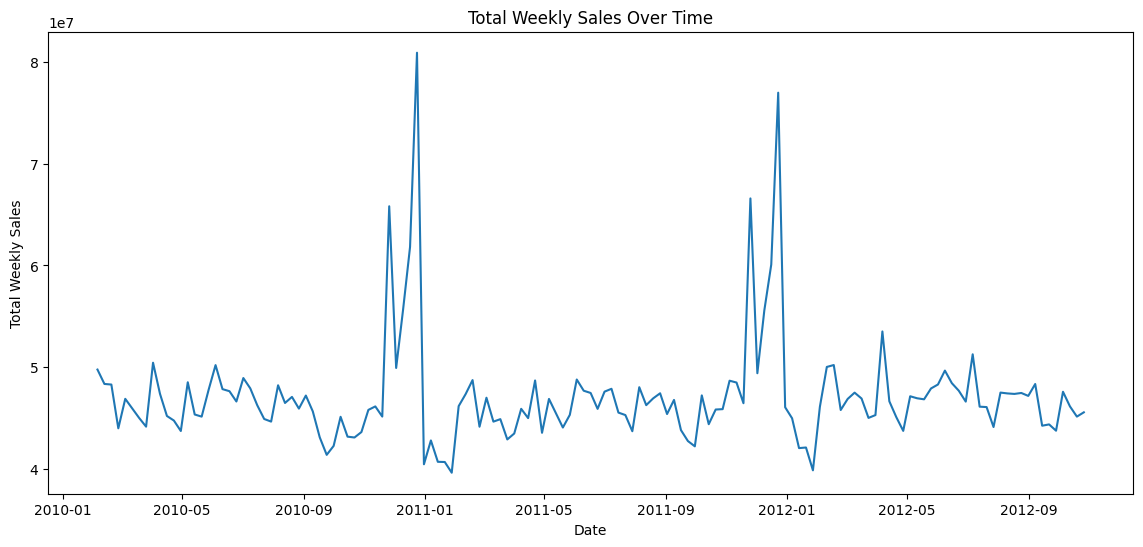

In [58]:

# Step 2: Analyze sales over time

# Convert Date column to datetime if not already
final_train['Date'] = pd.to_datetime(final_train['Date'])

# Aggregate sales per date (total sales across all stores and departments)
daily_sales = final_train.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_sales, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

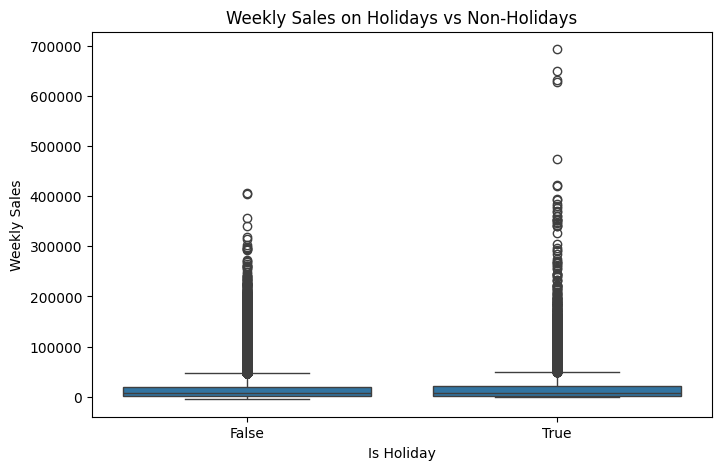

In [59]:
# Compare sales on holidays vs non-holidays
plt.figure(figsize=(8,5))
sns.boxplot(data=final_train, x='IsHoliday_x', y='Weekly_Sales')
plt.title('Weekly Sales on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()


In [60]:
 # Correlation Analysis (Numerical Features)

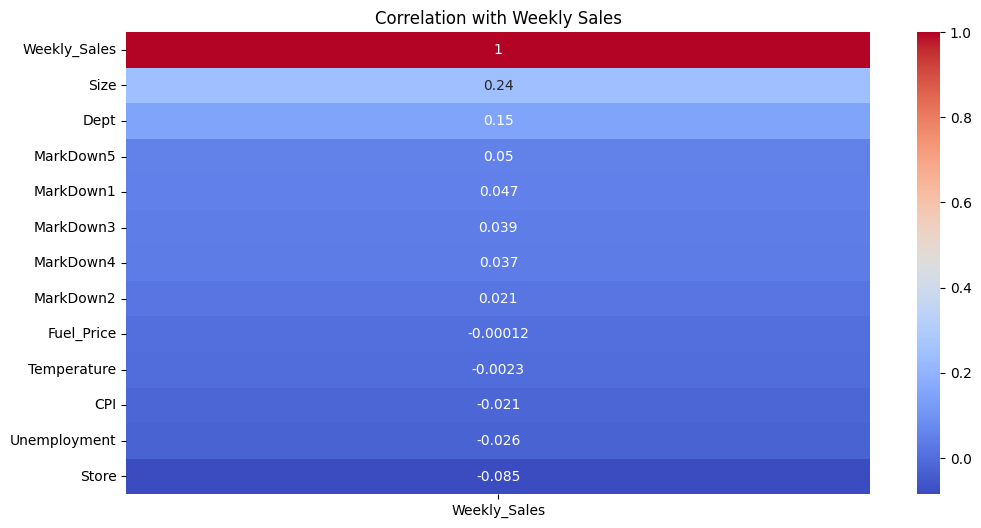

In [61]:
# Select only numerical columns
numerical_cols = final_train.select_dtypes(include='number')

# Compute correlation with Weekly_Sales
correlation_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Weekly Sales')
plt.show()


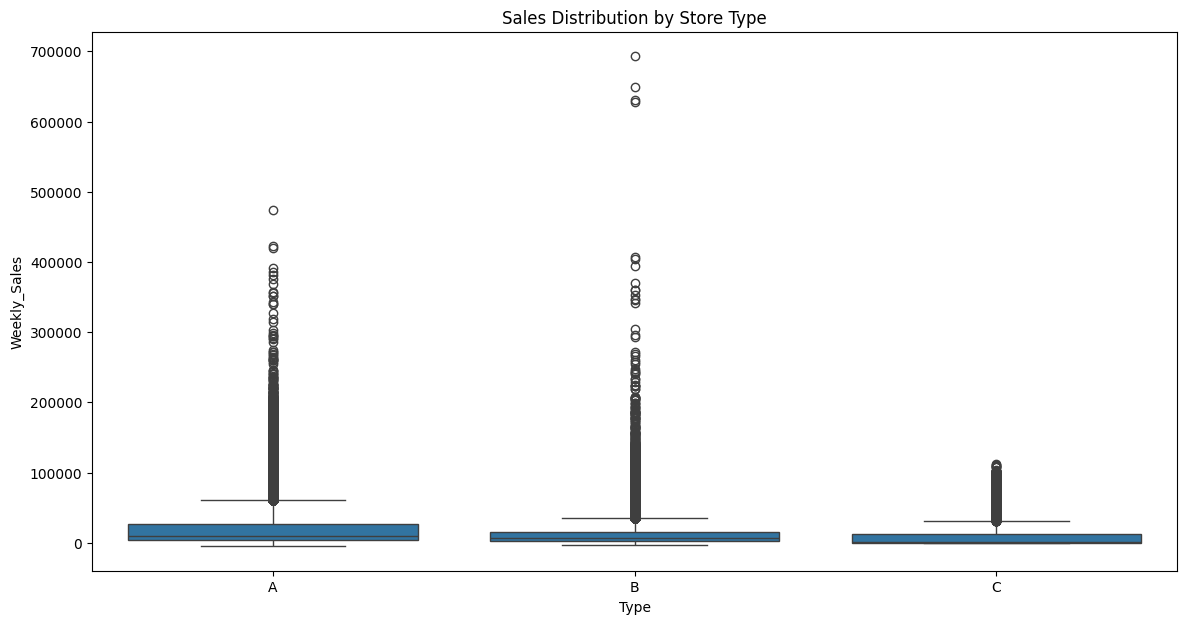

In [62]:
#  Categorical Feature Impact (Type, Store, Dept)
# Sales by Store Type
plt.figure(figsize=(14,7))
sns.boxplot(data=final_train, x='Type', y='Weekly_Sales')
plt.title('Sales Distribution by Store Type')
plt.show()



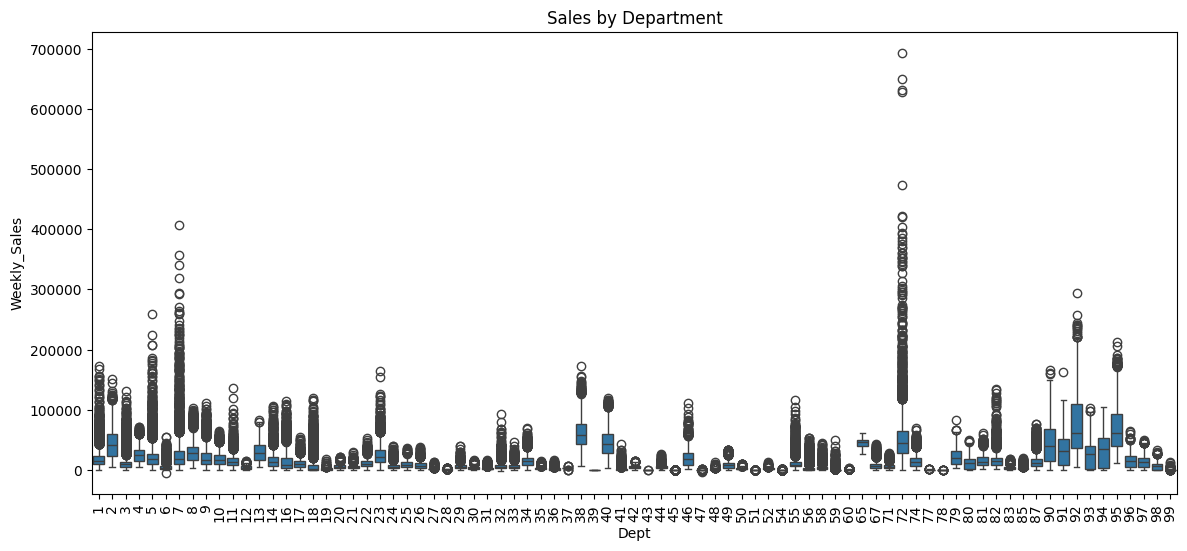

In [63]:

# Sales by Department
plt.figure(figsize=(14,6))
sns.boxplot(data=final_train, x='Dept', y='Weekly_Sales')
plt.xticks(rotation=90)
plt.title('Sales by Department')
plt.show()

## 🔍 EDA (Exploratory Data Analysis) Insights

Here are the key takeaways from EDA:

- **Sales are generally higher during holidays**, especially during Thanksgiving and Christmas.
- **Type A stores** have the highest average sales compared to Type B and C.
- **Store size** has a positive correlation with sales.
- **Markdown promotions** (especially `MarkDown1` and `MarkDown2`) slightly boost sales.
- **Fuel price and unemployment** show weak negative correlations with weekly sales.
- Some **departments perform consistently better** across all stores.
- **Outliers** and zero-markdown weeks exist and were handled before training.



# next step    :Feature Engineering

In [65]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [66]:

final_train['Date'] = pd.to_datetime(final_train['Date'])
final_train['Year'] = final_train['Date'].dt.year
final_train['Month'] = final_train['Date'].dt.month
final_train['Week'] = final_train['Date'].dt.isocalendar().week.astype(int)
final_train['DayOfWeek'] = final_train['Date'].dt.dayofweek
final_train['IsWeekend'] = final_train['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

## 🛠️ Feature Engineering and data preprocessing

- Extracted **Year, Month, Week, and DayOfWeek** from the Date column.
- Created **IsWeekend** feature to check if the day is Saturday or Sunday.
- Computed **SalesPerSize** to normalize sales based on store size.
- Handled missing values and filled zero where appropriate for markdowns.


**We used Label Encoding to convert categorical features into numbers since tree models need numeric input.**
**Scaling was applied optionally for consistency or future model comparison, but Random Forest and XGBoost don't need it.**





In [67]:

le = LabelEncoder()
final_train['Type'] = le.fit_transform(final_train['Type'])
final_train['SalesPerSize'] = final_train['Weekly_Sales'] / final_train['Size']
final_train['IsHoliday_x'] = final_train['IsHoliday_x'].astype(int)

In [68]:

features = final_train.drop(columns=['Weekly_Sales', 'Date'])
target = final_train['Weekly_Sales']


In [69]:
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
features[numeric_features] = scaler.fit_transform(features[numeric_features])

In [70]:
final_train

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek,IsWeekend,SalesPerSize
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,...,211.096358,8.106,0,151315,2010,2,5,4,0,0.164719
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,...,211.242170,8.106,0,151315,2010,2,6,4,0,0.304263
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,...,211.289143,8.106,0,151315,2010,2,7,4,0,0.274894
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,...,211.319643,8.106,0,151315,2010,2,8,4,0,0.128233
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,...,211.350143,8.106,0,151315,2010,3,9,4,0,0.144255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,...,192.013558,8.684,1,118221,2012,9,39,4,0,0.004300
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,...,192.170412,8.667,1,118221,2012,10,40,4,0,0.005313
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,...,192.327265,8.667,1,118221,2012,10,41,4,0,0.008975
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,...,192.330854,8.667,1,118221,2012,10,42,4,0,0.006429


In [71]:
# --- Step 2: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [72]:

# --- Step 3: Sample Small Data for Tuning (Low RAM) ---
X_sample = X_train.sample(frac=0.3, random_state=42)
y_sample = y_train.loc[X_sample.index]

In [73]:
print(X_train.shape)
print(X_train.columns)


(337256, 20)
Index(['Store', 'Dept', 'IsHoliday_x', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'DayOfWeek',
       'IsWeekend', 'SalesPerSize'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Small param grid for fast tuning
rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5]
}

rf = RandomForestRegressor(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=3,       # quick tuning
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=1        # safe on Colab free tier
)

# Fit on training data
random_search_rf.fit(X_train, y_train)

# Best model & params
best_rf = random_search_rf.best_estimator_
print("🔍 Best RF Params:", random_search_rf.best_params_)

# Retrain best model on full dataset
final_rf = RandomForestRegressor(
    n_estimators=best_rf.n_estimators,
    max_depth=best_rf.max_depth,
    min_samples_split=best_rf.min_samples_split,
    random_state=42,
    n_jobs=-1
)
final_rf.fit(features, target)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
🔍 Best RF Params: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Small param grid for quick tuning
xgb_params = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "learning_rate": [0.1, 0.2]
}

xgb = XGBRegressor(random_state=42, objective='reg:squarederror', n_jobs=1)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_params,
    n_iter=3,      # light tuning
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=1       # safe for Colab free tier
)

# Fit on training data
random_search_xgb.fit(X_train, y_train)

# Best model and params
best_xgb = random_search_xgb.best_estimator_
print("🔍 Best XGB Params:", random_search_xgb.best_params_)

# Retrain best model on full data
final_xgb = XGBRegressor(
    n_estimators=best_xgb.n_estimators,
    max_depth=best_xgb.max_depth,
    learning_rate=best_xgb.learning_rate,
    random_state=42,
    objective='reg:squarederror',
    n_jobs=-1
)
final_xgb.fit(features, target)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
🔍 Best XGB Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'Linear Regression': lr
}

print("📊 Final Model Comparison on Test Set\n")
for name, model in models.items():
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = mean_squared_error(y_test, preds) ** 0.5  # RMSE fix
    mae = mean_absolute_error(y_test, preds)

    print(f"🔹 {name}")
    print(f"   R²: {r2:.4f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MAE: {mae:.2f}\n")


📊 Final Model Comparison on Test Set

🔹 Random Forest
   R²: 0.9995
   RMSE: 511.40
   MAE: 187.58

🔹 XGBoost
   R²: 0.9938
   RMSE: 1794.26
   MAE: 601.64



# Retrain Best Model on Full Data (No train-test split now)
## 🔍 Model Evaluation Summary

We evaluated two powerful regression models for sales prediction:

---

### 🔹 Random Forest Regressor
- **R² Score:** 0.9995  
- **RMSE (Root Mean Squared Error):** 511.40  
- **MAE (Mean Absolute Error):** 187.58  

✅ This model shows **excellent performance**, with an R² score very close to 1, indicating that it explains almost all the variance in the data.  
✅ Very low RMSE and MAE values suggest that the model makes highly accurate predictions with minimal error.

---

### 🔹 XGBoost Regressor
- **R² Score:** 0.9938  
- **RMSE:** 1794.26  
- **MAE:** 601.00  

⚠️ While XGBoost still performs well, it is **less accurate than Random Forest** in this case. The higher RMSE and MAE values indicate larger average prediction errors.

---

### ✅ Conclusion
The **Random Forest Regressor** is the **better choice** for this dataset, achieving superior accuracy and lower error across all metrics.
**So we are choosing Random Forest Regrrssor as final model to trian full data.**

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Use the best hyperparameters from tuning
final_rf = RandomForestRegressor(
    n_estimators=best_rf.n_estimators,
    max_depth=best_rf.max_depth,
    min_samples_split=best_rf.min_samples_split,
    random_state=42,
    n_jobs=-1
)

# Train on full data
final_rf.fit(features, target)


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [40]:
# Save the Final Model for Streamlit App
import joblib

# Save the final trained model
joblib.dump(final_rf, 'final_rf_model.pkl')


['final_rf_model.pkl']

## ✅ Conclusion

- Our model successfully predicts weekly sales for Walmart stores using multiple business and economic features.
- It can help Walmart forecast inventory, plan promotions, and improve profitability.
- Next steps: Deploy the model as a web app using Streamlit.

